### Data Exploration

### Buoy Data
* Connecting to buoy data via downloaded csv
* Used pandas dataframe to stage data
* Buoy 45026
* Location: Stevensville, MI
* cooridinates: 41.982 N 86.619 W (41°58'55" N 86°37'10" W)

### Project Objective:
Collecting buoy data to determine optimum water and weather conditions for salmon fishing in Southwest Lake Michigan waters.  My assumption is that I can track historical trends and match with the fishing reports provided by the Michigan DNR to identify patterns of successful salmon fishing.  Targeted salmonoid are Steelhead and Coho.  Water surface temperature is hypothosized as a strong driver for salmon activity near water surface along with wind direction being a strong contributor to bait fish activity luring salmonoids closer to shore and piers(alewives - herring species in Lake Michigan).

In [6]:
# packages
import pandas as pd
import numpy as np
import re #importing regex for string parsing
pd.set_option('display.max_columns', None)

#ingesting downloaded csv
buoy_data = pd.read_csv(
    '/Users/errol/Downloads/2024_data.txt',
   # 'https://www.ndbc.noaa.gov/data/realtime2/45026.txt',
    sep = r'\s+',
    header = 0,
    index_col = None
)

#dataframe to drop first record since first record represents units of measurements for fields within dataset - I dont need this
df = buoy_data.iloc[1:]
df1 = pd.DataFrame(df)

In [8]:
# renaming fields
df1.rename(columns = {
    '#YY':'Year','MM':'Month','DD':'Day','hh':'Hour','mm':'Minute','WDIR':'Wind_Dir','WSPD':'Wind_Speed','GST':'Wind_Gust','WVHT':'Wave_Height',
    'DPD':'Dominant_Wave_Prd','APD':'Average_Wave_Prd','MWD':'Dominant_Wave_Dir','PRES':'Sea_Level_Pres','ATMP':'Air_Temperature',
    'WTMP':'Surface_Water_Temperature','DEWP':'Dew_Point_Temp','VIS':'Station_Visibility','PTDY':'Pressure_Tendency'
},inplace=True)

# appending timestamp fields
df1.insert(18,'Timestamp',(df1['Year'] + '-' + df1['Month'] + '-' + df1['Day']+ ' ' + df1['Hour'] + ':' + df1['Minute']).astype('str'),True)
df1.insert(19,'yyyy-mm-dd',(df1['Year'] + '-' + df1['Month'] + '-' + df1['Day']).astype('str'))
#df1.insert(20,'yyyy_mm_dd',(df1['Year']+df1['Month']+df1['Day']).astype('int'))

In [10]:
# first 10 records
df1.head(10)

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
1,2024,05,30,13,50,37,5.3,7.0,0.60,4.04,99.00,8,1024.6,13.5,16.3,7.4,99.0,99.00,2024-05-30 13:50,2024-05-30
2,2024,05,30,14,00,31,5.4,7.1,0.67,4.57,99.00,1,1024.7,13.4,16.3,7.5,99.0,99.00,2024-05-30 14:00,2024-05-30
3,2024,05,30,14,10,26,5.2,7.1,0.69,4.40,99.00,6,1024.6,13.5,16.3,7.7,99.0,99.00,2024-05-30 14:10,2024-05-30
4,2024,05,30,14,20,26,5.4,7.2,0.67,4.07,99.00,5,1024.5,13.7,16.3,7.8,99.0,99.00,2024-05-30 14:20,2024-05-30
5,2024,05,30,14,30,24,5.6,7.0,0.63,4.68,99.00,4,1024.4,13.8,16.3,8.0,99.0,99.00,2024-05-30 14:30,2024-05-30
6,2024,05,30,14,40,23,5.5,6.8,0.64,4.18,99.00,3,1024.5,13.8,16.3,8.1,99.0,99.00,2024-05-30 14:40,2024-05-30
7,2024,05,30,14,50,22,5.4,6.9,0.64,4.43,99.00,7,1024.5,13.9,16.3,8.1,99.0,99.00,2024-05-30 14:50,2024-05-30
8,2024,05,30,15,00,17,5.0,6.3,0.63,4.43,99.00,10,1024.5,14.0,16.3,8.3,99.0,99.00,2024-05-30 15:00,2024-05-30
9,2024,05,30,15,10,16,5.3,6.9,0.65,4.27,99.00,360,1024.5,14.3,16.3,8.7,99.0,99.00,2024-05-30 15:10,2024-05-30
10,2024,05,30,15,30,5,5.6,7.2,0.64,4.24,99.00,5,1024.6,14.6,16.4,8.7,99.0,99.00,2024-05-30 15:30,2024-05-30


#### date range

In [12]:
df1['Timestamp'].min(),df1['Timestamp'].max()
# data available from May 30 2025 thru November 25 2025
# Likely this is when the buoy data is collected and stored

('2024-05-30 13:50', '2024-11-25 16:00')

#### Checking for Null Values

In [14]:
df1.isna().sum()

Year                         0
Month                        0
Day                          0
Hour                         0
Minute                       0
Wind_Dir                     0
Wind_Speed                   0
Wind_Gust                    0
Wave_Height                  0
Dominant_Wave_Prd            0
Average_Wave_Prd             0
Dominant_Wave_Dir            0
Sea_Level_Pres               0
Air_Temperature              0
Surface_Water_Temperature    0
Dew_Point_Temp               0
Station_Visibility           0
TIDE                         0
Timestamp                    0
yyyy-mm-dd                   0
dtype: int64

#### Frequency Testing Partitioned by Month

In [38]:
df1.groupby('Month').size()

Month
05     199
06    4222
07    4262
08    4355
09    4227
10    4371
11    3468
dtype: int64

In [31]:
df1.describe()

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
count,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104,25104
unique,1,7,31,24,6,361,170,232,304,215,1,359,328,272,172,258,1,1,25104,180
top,2024,10,21,15,40,192,3.4,7.4,0.33,99.00,99.00,353,1016.4,22.1,19.6,19.1,99.0,99.00,2024-11-25 13:10,2024-05-31
freq,25104,4371,850,1070,4236,158,373,393,459,3824,25104,450,240,346,427,232,25104,25104,1,143


In [68]:
df1.dtypes

Year                         object
Month                        object
Day                          object
Hour                         object
Minute                       object
Wind_Dir                     object
Wind_Speed                   object
Wind_Gust                    object
Wave_Height                  object
Dominant_Wave_Prd            object
Average_Wave_Prd             object
Dominant_Wave_Dir            object
Sea_Level_Pres               object
Air_Temperature              object
Surface_Water_Temperature    object
Dew_Point_Temp               object
Station_Visibility           object
TIDE                         object
Timestamp                    object
yyyy-mm-dd                   object
dtype: object

In [44]:
df1.count()

Year                         25104
Month                        25104
Day                          25104
Hour                         25104
Minute                       25104
Wind_Dir                     25104
Wind_Speed                   25104
Wind_Gust                    25104
Wave_Height                  25104
Dominant_Wave_Prd            25104
Average_Wave_Prd             25104
Dominant_Wave_Dir            25104
Sea_Level_Pres               25104
Air_Temperature              25104
Surface_Water_Temperature    25104
Dew_Point_Temp               25104
Station_Visibility           25104
TIDE                         25104
Timestamp                    25104
yyyy-mm-dd                   25104
dtype: int64

#### Histogram to observe distribution of data

In [20]:
# converting object df to numeric
df2 = df1.apply(pd.to_numeric,errors = 'coerce')

In [22]:
# top 5 records of dataframe of numeric values
df2.head(5)

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
1,2024,5,30,13,50,37,5.3,7.0,0.60,4.04,99.0,8,1024.6,13.5,16.3,7.4,99.0,99.0,NaN,NaN
2,2024,5,30,14,0,31,5.4,7.1,0.67,4.57,99.0,1,1024.7,13.4,16.3,7.5,99.0,99.0,NaN,NaN
3,2024,5,30,14,10,26,5.2,7.1,0.69,4.40,99.0,6,1024.6,13.5,16.3,7.7,99.0,99.0,NaN,NaN
4,2024,5,30,14,20,26,5.4,7.2,0.67,4.07,99.0,5,1024.5,13.7,16.3,7.8,99.0,99.0,NaN,NaN
5,2024,5,30,14,30,24,5.6,7.0,0.63,4.68,99.0,4,1024.4,13.8,16.3,8.0,99.0,99.0,NaN,NaN


In [24]:
df2.describe()

,Year,Month,Day,Hour,Minute,Wind_Dir,Wind_Speed,Wind_Gust,Wave_Height,Dominant_Wave_Prd,Average_Wave_Prd,Dominant_Wave_Dir,Sea_Level_Pres,Air_Temperature,Surface_Water_Temperature,Dew_Point_Temp,Station_Visibility,TIDE,Timestamp,yyyy-mm-dd
count,25104.0,25104.000000,25104.000000,25104.000000,25104.000000,25104.00000,25104.000000,25104.000000,25104.000000,25104.000000,25104.0,25104.000000,25104.000000,25104.000000,25104.000000,25104.00000,25104.0,25104.0,0.0,0.0
mean,2024.0,8.401131,15.549554,11.498168,24.988846,170.56242,5.377350,7.200916,0.608539,18.452848,99.0,249.972793,1017.952573,18.695515,19.471272,13.34808,99.0,99.0,NaN,NaN
std,0.0,1.691507,8.737280,6.954367,17.112841,102.50299,3.006578,4.127816,1.009683,34.167320,0.0,102.120548,56.972917,7.819599,7.143918,5.46831,0.0,0.0,NaN,NaN
min,2024.0,5.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.030000,2.000000,99.0,0.000000,1001.200000,2.000000,9.600000,-1.60000,99.0,99.0,NaN,NaN
25%,2024.0,7.000000,8.000000,5.000000,10.000000,85.00000,3.100000,4.100000,0.260000,3.030000,99.0,197.000000,1013.700000,16.000000,17.200000,9.50000,99.0,99.0,NaN,NaN
50%,2024.0,8.000000,15.000000,12.000000,30.000000,171.00000,5.000000,6.600000,0.430000,4.180000,99.0,263.000000,1017.400000,19.700000,20.100000,14.20000,99.0,99.0,NaN,NaN
75%,2024.0,10.000000,23.000000,18.000000,40.000000,242.00000,7.400000,9.800000,0.810000,5.820000,99.0,343.000000,1021.400000,22.100000,22.200000,17.80000,99.0,99.0,NaN,NaN
max,2024.0,11.000000,31.000000,23.000000,50.000000,360.00000,17.000000,99.000000,99.000000,99.000000,99.0,360.000000,9999.000000,999.000000,999.000000,24.50000,99.0,99.0,NaN,NaN


#### Histogram to visualize distribution of data

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Minute'}>,
        <Axes: title={'center': 'Wind_Dir'}>,
        <Axes: title={'center': 'Wind_Speed'}>,
        <Axes: title={'center': 'Wind_Gust'}>],
       [<Axes: title={'center': 'Wave_Height'}>,
        <Axes: title={'center': 'Dominant_Wave_Prd'}>,
        <Axes: title={'center': 'Average_Wave_Prd'}>,
        <Axes: title={'center': 'Dominant_Wave_Dir'}>],
       [<Axes: title={'center': 'Sea_Level_Pres'}>,
        <Axes: title={'center': 'Air_Temperature'}>,
        <Axes: title={'center': 'Surface_Water_Temperature'}>,
        <Axes: title={'center': 'Dew_Point_Temp'}>],
       [<Axes: title={'center': 'Station_Visibility'}>,
        <Axes: title={'center': 'TIDE'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'yyyy-mm-dd'}>]], dtype=object)

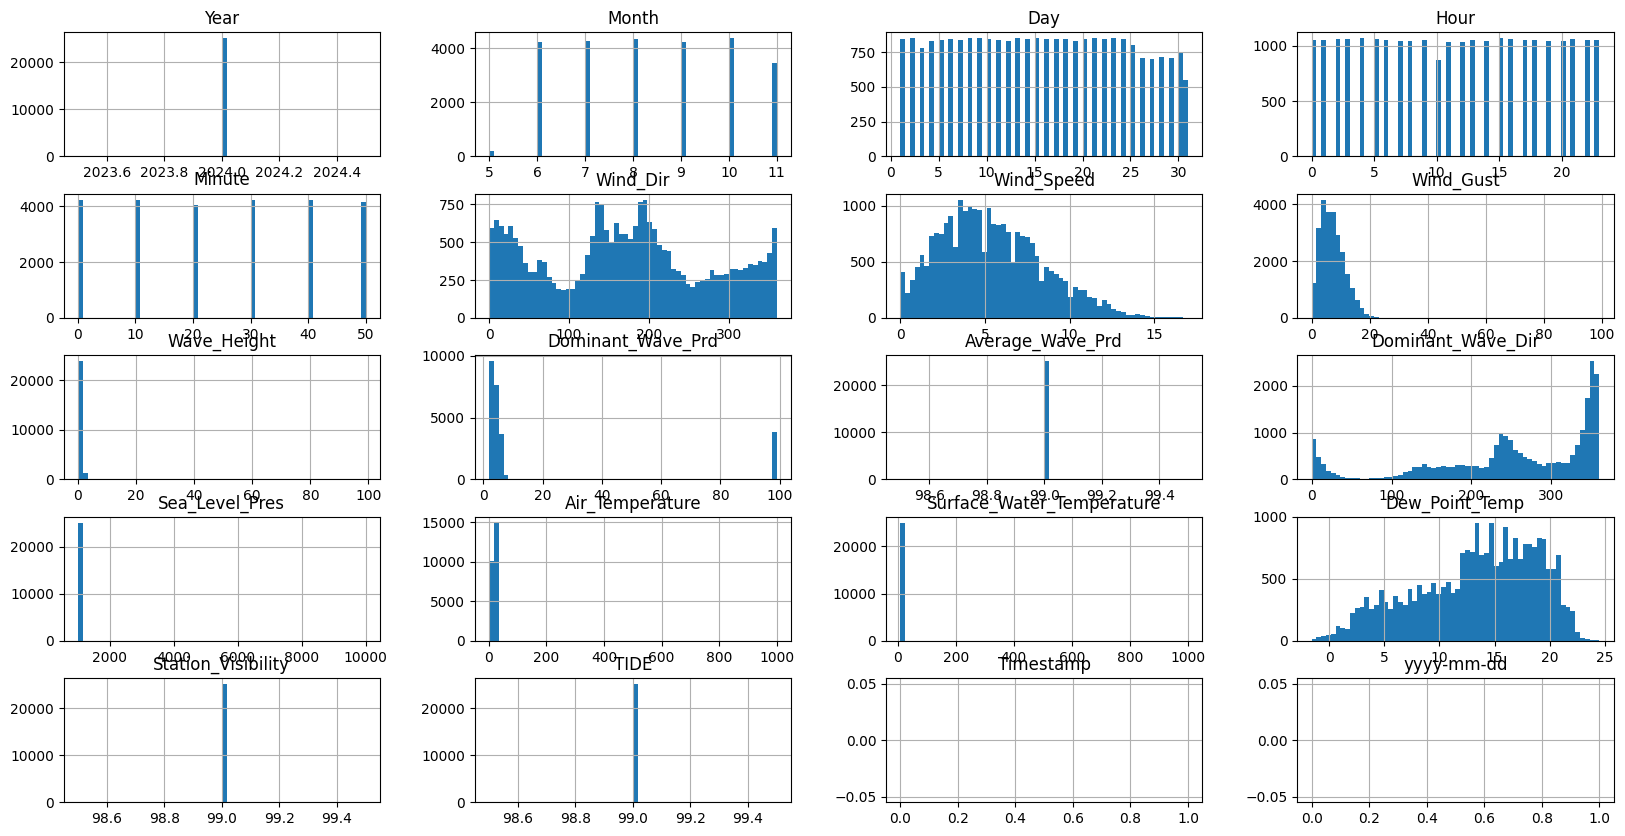

In [27]:
# Run as of 2025-07-27
df2.hist(bins=60,figsize=(20,10))

#### Histogram Notes

Wind Direction: 

x-axis represents direction in degrees, 0 degrees = N, 90 degrees = E, 180 = S, 270 = W, and 360 = N;
y-axis represents frequency of the bucket values.  For example, between 0 and 100 degrees (so between North and slightly South East wind directions) the distribution is positively skewed with the majority of recordings in this bucket being closer to the North wind direction (lower values); 
Given that wind direction changes through out the day, this histogram of wind direction tells me that the mean wind direction is likely between 150 degrees to 200 degrees (South East to SSW) indicating from the buoy's vantage point, wind coming from the North, North West region.

Wind Speed:

Positively skewed with the majority of recordings indicating wind speed at..


Wind Gust:

Positively skewed indicating majority of records between 0 and 20 ...


Dominant Wind Direction:

Is an indication of the direction the wave's force is traveling from.  This histogram shows that the dominant wind direction is negatively skewed in relation to its direction, indicating the majority wave energy is coming from the north


Dew Point:

In [29]:
min(df2['Wind_Speed']),max(df2['Wind_Speed']) #wind direction values as this represents direction in degrees

(0.0, 17.0)

In [ ]:
# Notes: Left off on histogram analysis - incorporate value conversions, wind direction is in meters per second and temps are in celcius - change that